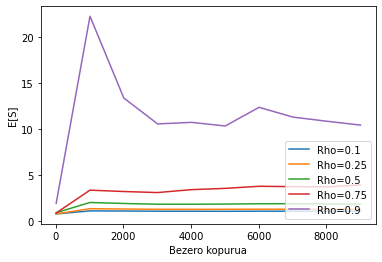

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statistics


def MM1_g(bezero_kopurua,iritsi_den,zer_den):
    bezero_indizea=0
    irteera_denbora=-1
    soj=[]
    itxaron_denbora=[]

    while bezero_indizea<bezero_kopurua:
        if iritsi_den[bezero_indizea]>irteera_denbora:  
            itxaron_denbora.append(0)
            soj.append(zer_den[bezero_indizea])
            irteera_denbora=(soj[bezero_indizea]
                             +iritsi_den[bezero_indizea])
            bezero_indizea=bezero_indizea+1
        
        else:   #ilara ez dago libre 
            itxaron_denbora.append(irteera_denbora
                                   -iritsi_den[bezero_indizea])
            soj.append(zer_den[bezero_indizea]
                       +itxaron_denbora[bezero_indizea])
            irteera_denbora=(soj[bezero_indizea]
                             +iritsi_den[bezero_indizea])
            bezero_indizea=bezero_indizea+1


    ES=statistics.mean(soj)
    return ES

indizea=[]
ES=[]
for i in range(5):
    ES.append([])
#bezeroen iritsiera denborak
iritsi_den=[]
n=0
for i in [0.1,0.25,0.5,0.75,0.9]:
    l=i
    iritsi_den.append([])
    ir_a_den=[]
    for i in range(10**6):
        ir_a_den.append(np.random.exponential(1/l))

    for i in range(10**6):
        if i==0:
            iritsi_den[n].append(ir_a_den[0])
        else:
            iritsi_den[n].append(iritsi_den[n][i-1]
                                 +ir_a_den[i])
    n=n+1
    
mu=1
#zerbitzu denbora
zer_den=[]
for i in range(10**6):
    den=np.random.exponential(1/mu)
    zer_den.append(den)

for i in range(10,10**6,1000):
    indizea.append(i)
    ES[0].append(MM1_g(i,iritsi_den[0],zer_den))
    ES[1].append(MM1_g(i,iritsi_den[1],zer_den))
    ES[2].append(MM1_g(i,iritsi_den[2],zer_den))
    ES[3].append(MM1_g(i,iritsi_den[3],zer_den))
    ES[4].append(MM1_g(i,iritsi_den[4],zer_den))
    
plt.plot(indizea,ES[0],indizea,ES[1],
         indizea,ES[2],indizea,ES[3],indizea,ES[4])
plt.xlabel('Bezero kopurua')
plt.ylabel('E[S]')
plt.legend(("Rho=0.1","Rho=0.25","Rho=0.5",
            "Rho=0.75",'Rho=0.9'),loc="lower right")
plt.savefig('MM1lamda_desberdinprueba.pdf')